# **Preprocesamiento de los datos**
Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas.

In [87]:
# carga de datos
import time
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

Cargamos todas las librerias necesarias para nuestro estudio

In [88]:
# machine learning
from feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.utils import resample,shuffle

In [89]:
!pip install nltk

In [90]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# **Carga de Datos**
En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab**

In [5]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
df = pd.read_excel("/content/Terrorismo_final.xlsx")

In [6]:
data_1="Terrorismo_final"
df = pd.read_excel(data_1 + ".xlsx", header=0, parse_dates=False, index_col=0)

A continuación se describe el conjunto de datos

In [91]:
df.head(5)


año  mes  día            país_txt                   región_txt  \
eventid                                                                         
197000000000  1970    0    0              Mexico                North America   
197000000000  1970    7    2  Dominican Republic  Central America & Caribbean   
197001000000  1970    1    1       United States                North America   
197001000000  1970    1    1       United States                North America   
197001000000  1970    1    2             Uruguay                South America   

                     ciudad     latitud    longitud  crit  multiple  ...  \
eventid                                                              ...   
197000000000    Mexico city  19371887.0 -99086624.0     1         0  ...   
197000000000  Santo Domingo  18456792.0 -69951164.0     1         0  ...   
197001000000          Cairo  37005105.0 -89176269.0     1         0  ...   
197001000000        Baraboo    434685.0 -89744299.0     1         0  ...   
197001000000     Montevideo -34891151.0 -56187214.0     1         0  ...   

                                    organizacion  tipoarmamento muertos  \
eventid                                                                   
197000000000  23rd of September Communist League        Unknown     0.0   
197000000000                              MANO-D        Unknown     1.0   
197001000000                  Black Nationalists       Firearms     0.0   
197001000000     Weather Underground, Weathermen     Explosives     0.0   
197001000000                 Tupamaros (Uruguay)       Firearms     0.0   

             muertosterroristas heridos secuestrovictima rescate  \
eventid                                                            
197000000000                  0     0.0              1.0     1.0   
197000000000                  0     0.0              0.0     0.0   
197001000000                0.0     0.0              0.0     0.0   
197001000000                  0     0.0              0.0     0.0   
197001000000                  0     0.0              0.0     0.0   

                                                        sumario  \
eventid                                                           
197000000000                                   nada que aportar   
197000000000                                   nada que aportar   
197001000000  1/1/1970: Unknown African American assailants ...   
197001000000                                   nada que aportar   
197001000000                                   nada que aportar   

                                                      motivo  bajas  
eventid                                                              
197000000000                                nada que aportar    0.0  
197000000000                                nada que aportar    1.0  
197001000000  To protest the Cairo Illinois Police Deparment    0.0  
197001000000                                nada que aportar    0.0  
197001000000                                nada que aportar    0.0  

[5 rows x 25 columns]

Número de registros y columnas en el conjunto de datos.

In [92]:
# número de registros y columnas en el conjunto de datos
print("número de filas:",df.shape[0])
print("número de columnas:",df.shape[1])

número de filas: 111952
número de columnas: 25


Tpos de datos en cada columna

In [93]:
# tipo de datos en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111952 entries, 197000000000 to 201912000000
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   año                  111952 non-null  int64  
 1   mes                  111952 non-null  int64  
 2   día                  111952 non-null  int64  
 3   país_txt             111952 non-null  object 
 4   región_txt           111952 non-null  object 
 5   ciudad               111952 non-null  object 
 6   latitud              108637 non-null  float64
 7   longitud             108637 non-null  float64
 8   crit                 111952 non-null  int64  
 9   multiple             111952 non-null  int64  
 10  éxito                111952 non-null  int64  
 11  suicidio             111952 non-null  int64  
 12  tipodeataque_txt     111952 non-null  object 
 13  tipoobjetivo         111952 non-null  object 
 14  nacionalidadvictima  111952 non-null  object 
 15  

Busqueda de valores nulos

In [94]:
print ('Existencia de valores nulos', df.isnull().values.any())
print ('Número total de valores nulos en el conjunto de datos: ', df.isnull().sum().sum())


Existencia de valores nulos True
Número total de valores nulos en el conjunto de datos:  6630


Valores nulos por columnas en el total del conjunto de datos

In [95]:
print ('Valores nulos por columnas en el total del conjunto de datos: ', df.isnull().sum())


Valores nulos por columnas en el total del conjunto de datos:  año                       0
mes                       0
día                       0
país_txt                  0
región_txt                0
ciudad                    0
latitud                3315
longitud               3315
crit                      0
multiple                  0
éxito                     0
suicidio                  0
tipodeataque_txt          0
tipoobjetivo              0
nacionalidadvictima       0
organizacion              0
tipoarmamento             0
muertos                   0
muertosterroristas        0
heridos                   0
secuestrovictima          0
rescate                   0
sumario                   0
motivo                    0
bajas                     0
dtype: int64


Busqueda de valores duplicados

In [96]:
#checking duplicate values
print("El número de valores duplicados son:",df.duplicated().sum())

El número de valores duplicados son: 7723


Cambio de nombres de las columnas

In [97]:
df.rename(columns =
                  {'iyear':'año',
                   'imonth':'mes',
                   'iday':'día',
                   'country_txt' : 'país_txt',
                   'region_txt' : 'región_txt',
                   'crit1' : 'crit',
                   'attacktype1_txt' : 'tipodeataque_txt',
                   'targtype1_txt' : 'tipoobjetivo',
                   'natlty1_txt' : 'nacionalidadvictima',
                   'gname' : 'organizacion',
                   'claimed' : 'autoría',
                   'weaptype1_txt' : 'tipoarmamento',
                   'nkill' : 'muertos',
                   'nkillter' : 'muertosterroristas',
                   'nwound' : 'heridos',
                   'propextent_txt' : 'propdamageextent',
                   'ishostkid' : 'secuestrovictima',
                   'ransom' : 'rescate','success':'éxito','suicide':'suicidio', 'city':'ciudad', 'provstate':'provincia', 'country':'país', 'latitude':'latitud','longitude':'longitud', 'summary':'sumario'
                   }, inplace = True)


Añadir una columna con bajas que sume los muertos y los heridos ('nkill' y 'nwound')


In [98]:
df['bajas'] = df['muertos'] + df['heridos']

Se procede a limitar la longitud de los String

In [100]:
df['tipoarmamento'] = df['tipoarmamento'].replace(u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')


df['propdamageextent'] = df['propdamageextent'].replace('Minor (likely < $1 million)', 'Minor')
df['propdamageextent'] = df['propdamageextent'].replace('Major (likely > 1 billion)', 'Major')
df['propdamageextent'] = df['propdamageextent'].replace('Catastrophic (likely > $1 billion)', 'Catastrophic')


KeyError: ignored

Se procede a eliminar los valores missings o NaN y los sustituimos por valores vacios string ''.

In [16]:
#replacing any missing or NaN values in the weaptype1_txt,weaptype2_txt,weaptype3_txt column of the data dataframe with an empty string ''.

df['tipoarmamento'] = df['tipoarmamento'].fillna('desconocido')
df['sumario']=df['sumario'].fillna('nada que aportar')
df['motivo']=df['motivo'].fillna('nada que aportar')
df['tipoobjetivo'] = df['tipoobjetivo'].fillna('desconocido')

Rellenamos los datos de la nacionalidad de las victimas

In [101]:
#filling the missing values of victims nationality
df['nacionalidadvictima'] = df['nacionalidadvictima'].fillna('desconocido')


Relleno los registros vacios de muertos, heridos y bajas con el valor medio

In [102]:
df['bajas'] = df['bajas'].fillna(df['bajas'].median())
df['heridos'] = df['heridos'].fillna(df['heridos'].median())
df['muertos'] = df['muertos'].fillna(df['muertos'].median())

In [103]:
# Missing Values/Null Values Count
df.isnull().sum()

año                       0
mes                       0
día                       0
país_txt                  0
región_txt                0
ciudad                    0
latitud                3315
longitud               3315
crit                      0
multiple                  0
éxito                     0
suicidio                  0
tipodeataque_txt          0
tipoobjetivo              0
nacionalidadvictima       0
organizacion              0
tipoarmamento             0
muertos                   0
muertosterroristas        0
heridos                   0
secuestrovictima          0
rescate                   0
sumario                   0
motivo                    0
bajas                     0
dtype: int64

Se procede a eliminar la variable approxdate: pues no aporta nada o no son objeto de estudio.

In [104]:
df.drop(['extended','vicinity','propdamageextent','nreleased','nperps','autoría'], axis = 1, inplace = True)


KeyError: ignored

# Se procede a identificar los valores de Organizacion que son Unknown, pues no aportan nada.

In [105]:
len(df[df['organizacion']=="Unknown"])/len(df)*100

0.0

In [106]:
len(df['organizacion'].unique())

3670

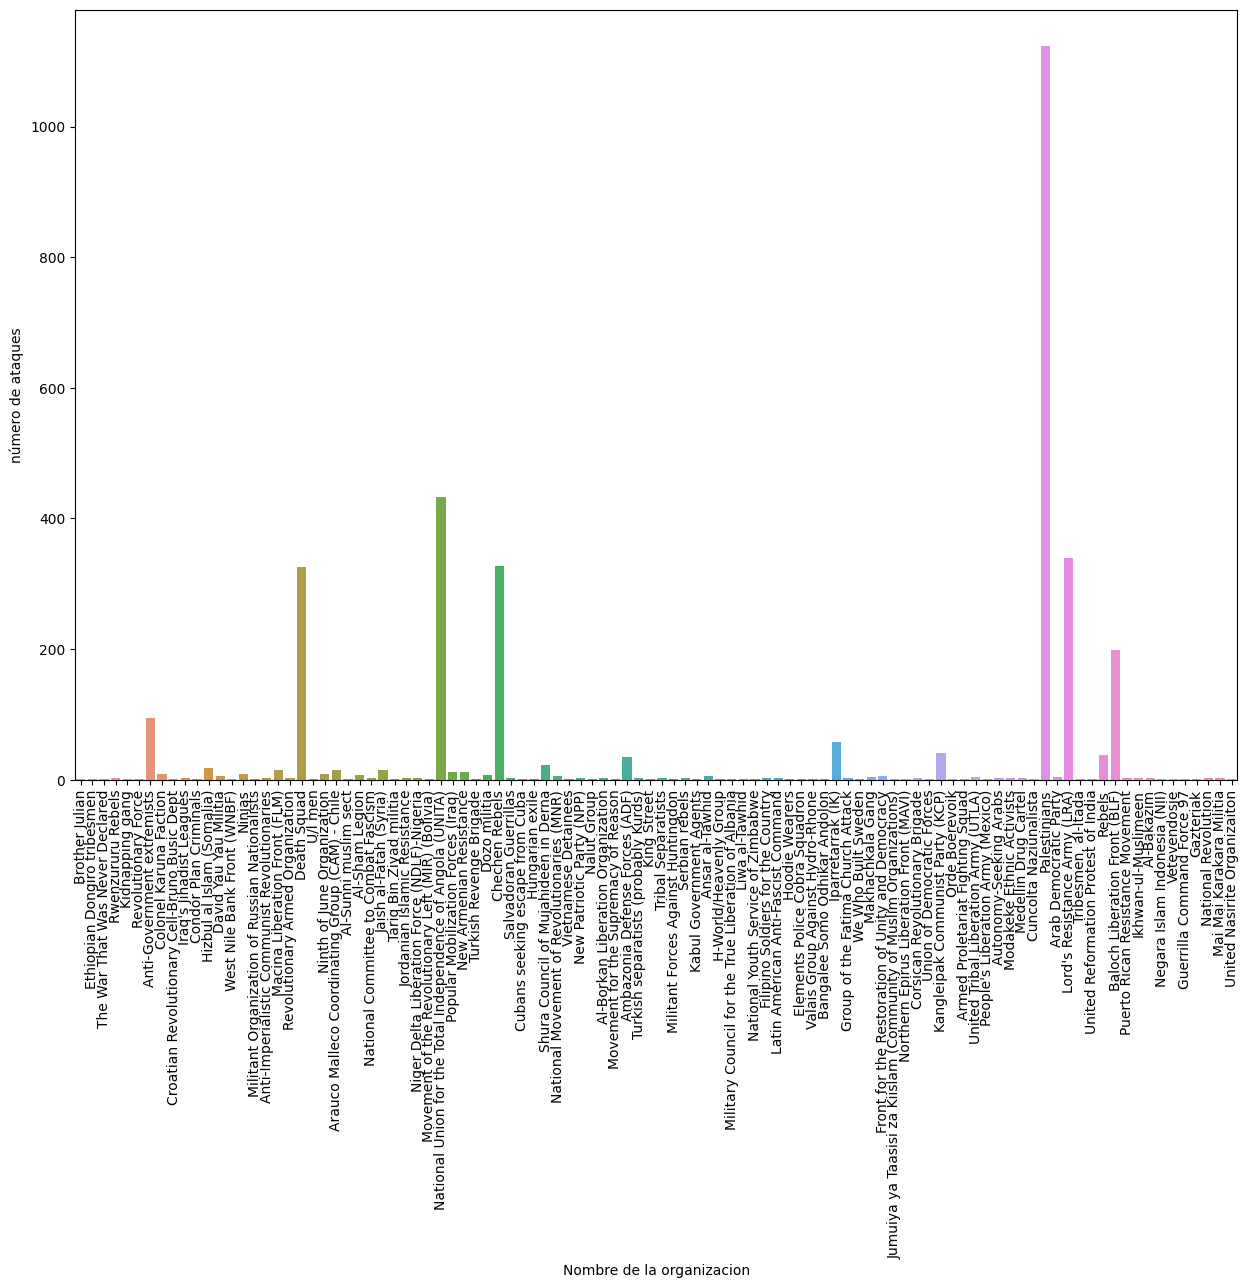

In [107]:
plt.subplots(figsize=(15,10))
no_of_classes = df['organizacion'].value_counts(sort=True)
no_of_classes_sample = no_of_classes.sample(n=100)
p = sns.barplot(x=no_of_classes_sample.index,y=no_of_classes_sample)
p.set(xlabel="Nombre de la organizacion",ylabel="número de ataques")
p.set_xticklabels(no_of_classes_sample.index,rotation=90)
plt.show()

In [108]:
threshold = 500
class_freq = df[df['organizacion']!='Unknown']['organizacion'].value_counts() #Frequency table of Terrorist groups, sorted by default in descending order
class_freq[threshold] # this value is frequency of class at 500th index. i.e., 11

14

Elejimos un nuevo conjunto de datos sin los valores unknown en la organización

In [109]:
df = df[df['organizacion']!='Unknown']#

Resumen de los datos finales preprocesados

In [26]:
df.head(3)

año  mes  día            país_txt                   región_txt  \
eventid                                                                         
197000000000  1970    0    0              Mexico                North America   
197000000000  1970    7    2  Dominican Republic  Central America & Caribbean   
197001000000  1970    1    1       United States                North America   

                     ciudad     latitud    longitud  crit  multiple  ...  \
eventid                                                              ...   
197000000000    Mexico city  19371887.0 -99086624.0     1         0  ...   
197000000000  Santo Domingo  18456792.0 -69951164.0     1         0  ...   
197001000000          Cairo  37005105.0 -89176269.0     1         0  ...   

                                    organizacion  tipoarmamento muertos  \
eventid                                                                   
197000000000  23rd of September Communist League        Unknown     0.0   
197000000000                              MANO-D        Unknown     1.0   
197001000000                  Black Nationalists       Firearms     0.0   

             muertosterroristas heridos secuestrovictima rescate  \
eventid                                                            
197000000000                NaN     0.0              1.0     1.0   
197000000000                NaN     0.0              0.0     0.0   
197001000000                0.0     0.0              0.0     0.0   

                                                        sumario  \
eventid                                                           
197000000000                                   nada que aportar   
197000000000                                   nada que aportar   
197001000000  1/1/1970: Unknown African American assailants ...   

                                                      motivo  bajas  
eventid                                                              
197000000000                                nada que aportar    0.0  
197000000000                                nada que aportar    1.0  
197001000000  To protest the Cairo Illinois Police Deparment    0.0  

[3 rows x 25 columns]

In [110]:
print ('Conjunto de datos final: ', df.shape)

Conjunto de datos final:  (111952, 25)


Se procede a revisar cuantos valores seguimos teniendo nulos

In [111]:
# Missing Values/Null Values Count
df.isnull().sum()

año                       0
mes                       0
día                       0
país_txt                  0
región_txt                0
ciudad                    0
latitud                3315
longitud               3315
crit                      0
multiple                  0
éxito                     0
suicidio                  0
tipodeataque_txt          0
tipoobjetivo              0
nacionalidadvictima       0
organizacion              0
tipoarmamento             0
muertos                   0
muertosterroristas        0
heridos                   0
secuestrovictima          0
rescate                   0
sumario                   0
motivo                    0
bajas                     0
dtype: int64

Se procede a poner como 0 los variables missing numéricas de 'muertosterroristas', 'rescate', 'autoria', 'secuestrovictima' y 'multiple'

In [112]:
df['muertosterroristas'] = df['muertosterroristas'].fillna('0')
df['rescate'] = df['rescate'].fillna('0')
df['secuestrovictima'] = df['secuestrovictima'].fillna('0')
df['multiple'] = df['multiple'].fillna('0')

Se procede a poner como 'desconocido' las variables missing de 'ciudad'

In [31]:
df['ciudad'] = df['ciudad'].fillna('desconocido')
df['sumario'] = df['sumario'].fillna('desconocido')
df['motivo'] = df['motivo'].fillna('desconocido')


Volvemos a comprobar los valores nulos

In [113]:
# Missing Values/Null Values Count
df.isnull().sum()

año                       0
mes                       0
día                       0
país_txt                  0
región_txt                0
ciudad                    0
latitud                3315
longitud               3315
crit                      0
multiple                  0
éxito                     0
suicidio                  0
tipodeataque_txt          0
tipoobjetivo              0
nacionalidadvictima       0
organizacion              0
tipoarmamento             0
muertos                   0
muertosterroristas        0
heridos                   0
secuestrovictima          0
rescate                   0
sumario                   0
motivo                    0
bajas                     0
dtype: int64

Eliminamos los registros sin coordenadas. Para ello seleccionamos los registros que tienen al menos 1 nulo y luego eliminamos esos registros.  

In [114]:
df_limpio = df.dropna(axis = 0, how ='any')

df_limpio

año  mes  día            país_txt                   región_txt  \
eventid                                                                         
197000000000  1970    0    0              Mexico                North America   
197000000000  1970    7    2  Dominican Republic  Central America & Caribbean   
197001000000  1970    1    1       United States                North America   
197001000000  1970    1    1       United States                North America   
197001000000  1970    1    2             Uruguay                South America   
...            ...  ...  ...                 ...                          ...   
201912000000  2019   12   31               Nepal                   South Asia   
201912000000  2019   12   31               Nepal                   South Asia   
201912000000  2019   12   31         Afghanistan                   South Asia   
201912000000  2019   12   31         Afghanistan                   South Asia   
201912000000  2019   12   31         Afghanistan                   South Asia   

                       ciudad     latitud    longitud  crit  multiple  ...  \
eventid                                                                ...   
197000000000      Mexico city  19371887.0 -99086624.0     1         0  ...   
197000000000    Santo Domingo  18456792.0 -69951164.0     1         0  ...   
197001000000            Cairo  37005105.0 -89176269.0     1         0  ...   
197001000000          Baraboo    434685.0 -89744299.0     1         0  ...   
197001000000       Montevideo -34891151.0 -56187214.0     1         0  ...   
...                       ...         ...         ...   ...       ...  ...   
201912000000           Piluwa  27163229.0  85063926.0     1         0  ...   
201912000000       Bheriganga  28434293.0  81745885.0     1         0  ...   
201912000000  Darzab district  36002759.0  65366046.0     1         1  ...   
201912000000  Darzab district  36002759.0  65366046.0     1         1  ...   
201912000000  Darzab district  36002759.0  65366046.0     1         1  ...   

                                                   organizacion  \
eventid                                                           
197000000000                 23rd of September Communist League   
197000000000                                             MANO-D   
197001000000                                 Black Nationalists   
197001000000                    Weather Underground, Weathermen   
197001000000                                Tupamaros (Uruguay)   
...                                                         ...   
201912000000  Communist Party of Nepal - Maoist (CPN-Maoist-...   
201912000000  Communist Party of Nepal - Maoist (CPN-Maoist-...   
201912000000                                            Taliban   
201912000000                                            Taliban   
201912000000                                            Taliban   

              tipoarmamento muertos muertosterroristas heridos  \
eventid                                                          
197000000000        Unknown     0.0                  0     0.0   
197000000000        Unknown     1.0                  0     0.0   
197001000000       Firearms     0.0                0.0     0.0   
197001000000     Explosives     0.0                  0     0.0   
197001000000       Firearms     0.0                  0     0.0   
...                     ...     ...                ...     ...   
201912000000     Incendiary     0.0                0.0     0.0   
201912000000     Incendiary     0.0                0.0     0.0   
201912000000     Incendiary     0.0                0.0     0.0   
201912000000     Incendiary     0.0                0.0     0.0   
201912000000     Incendiary     0.0                0.0     0.0   

             secuestrovictima rescate  \
eventid                                 
197000000000              1.0     1.0   
197000000000              0.0     0.0   
197001000000              0.0     0.0   
1970010000

In [115]:
df_limpio.isnull().sum()

año                    0
mes                    0
día                    0
país_txt               0
región_txt             0
ciudad                 0
latitud                0
longitud               0
crit                   0
multiple               0
éxito                  0
suicidio               0
tipodeataque_txt       0
tipoobjetivo           0
nacionalidadvictima    0
organizacion           0
tipoarmamento          0
muertos                0
muertosterroristas     0
heridos                0
secuestrovictima       0
rescate                0
sumario                0
motivo                 0
bajas                  0
dtype: int64

In [116]:
df_numeric = df_limpio.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['año' 'mes' 'día' 'latitud' 'longitud' 'crit' 'multiple' 'éxito'
 'suicidio' 'muertos' 'heridos' 'bajas']


<Axes: ylabel='eventid'>

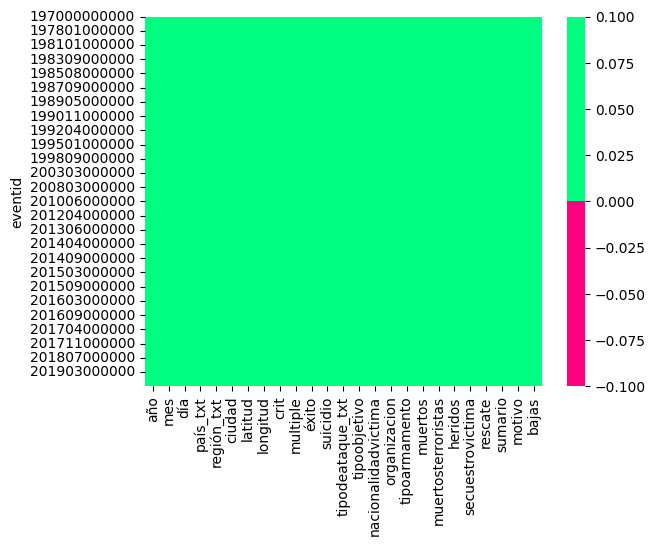

In [117]:
cols = df_limpio.columns[:26] # primeras 15 columnas
colours = ['#ff0080', '#00ff80'] # especificamos los colores - rosa es no missing, verde es missing
sns.heatmap(df_limpio[cols].isnull(), cmap=sns.color_palette(colours))

año - 0%
mes - 0%
día - 0%
país_txt - 0%
región_txt - 0%
ciudad - 0%
latitud - 0%
longitud - 0%
crit - 0%
multiple - 0%
éxito - 0%
suicidio - 0%
tipodeataque_txt - 0%
tipoobjetivo - 0%
nacionalidadvictima - 0%
organizacion - 0%
tipoarmamento - 0%
muertos - 0%
muertosterroristas - 0%
heridos - 0%
secuestrovictima - 0%
rescate - 0%
sumario - 0%
motivo - 0%
bajas - 0%


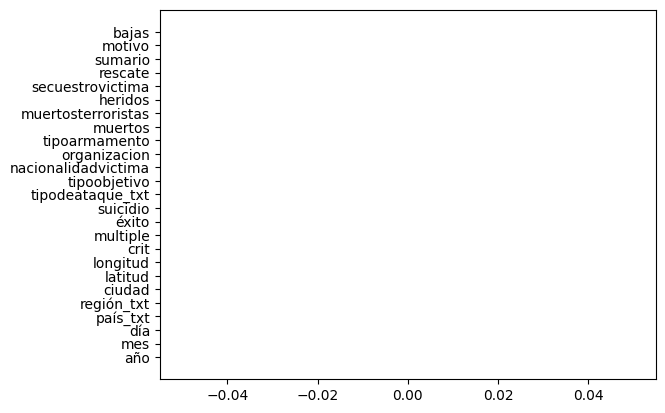

In [118]:
for col in df_limpio.columns:
    pct_missing = np.mean(df_limpio[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

Tambien se puede ver con feature_selector si existen duplicados.

In [119]:
fs = FeatureSelector(data = df_limpio, labels = df_limpio.columns)

Se muestran solo las variables que tienen más de un 80% de valores perdidos. Podemos ver que no tenemos variables con más del 80% de missings

In [120]:
fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



In [121]:

# iterating the columns
for col in df.columns:
    print(col)

año
mes
día
país_txt
región_txt
ciudad
latitud
longitud
crit
multiple
éxito
suicidio
tipodeataque_txt
tipoobjetivo
nacionalidadvictima
organizacion
tipoarmamento
muertos
muertosterroristas
heridos
secuestrovictima
rescate
sumario
motivo
bajas


Información general del conjunto de datos

In [122]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108637 entries, 197000000000 to 201912000000
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   año                  108637 non-null  int64  
 1   mes                  108637 non-null  int64  
 2   día                  108637 non-null  int64  
 3   país_txt             108637 non-null  object 
 4   región_txt           108637 non-null  object 
 5   ciudad               108637 non-null  object 
 6   latitud              108637 non-null  float64
 7   longitud             108637 non-null  float64
 8   crit                 108637 non-null  int64  
 9   multiple             108637 non-null  int64  
 10  éxito                108637 non-null  int64  
 11  suicidio             108637 non-null  int64  
 12  tipodeataque_txt     108637 non-null  object 
 13  tipoobjetivo         108637 non-null  object 
 14  nacionalidadvictima  108637 non-null  object 
 15  

Exporto el conjunto de datos limpio para futuros trabajos

In [123]:
df_limpio.describe()

año            mes            día       latitud  \
count  108637.000000  108637.000000  108637.000000  1.086370e+05   
mean     2003.023749       6.440853      15.507184  1.902460e+07   
std        14.299491       3.376826       8.757118  1.908803e+07   
min      1970.000000       0.000000       0.000000 -5.315461e+07   
25%      1990.000000       4.000000       8.000000  3.521018e+06   
50%      2010.000000       6.000000      15.000000  1.734578e+07   
75%      2015.000000       9.000000      23.000000  3.428356e+07   
max      2019.000000      12.000000      31.000000  6.714367e+07   

           longitud           crit       multiple          éxito  \
count  1.086370e+05  108637.000000  108637.000000  108637.000000   
mean   2.138347e+07       0.996428       0.191086       0.901534   
std    5.635073e+07       0.059656       0.393158       0.297944   
min   -1.578583e+08       0.000000       0.000000       0.000000   
25%   -5.956210e+05       1.000000       0.000000       1.000000   
50%    3.380086e+07       1.000000       0.000000       1.000000   
75%    6.540503e+07       1.000000       0.000000       1.000000   
max    1.793667e+08       1.000000       1.000000       1.000000   

            suicidio        muertos        heridos          bajas  
count  108637.000000  108637.000000  108637.000000  108637.000000  
mean        0.044175       2.988420       3.186069       6.174489  
std         0.205484      13.993802      53.342247      61.036666  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       1.000000  
75%         0.000000       2.000000       1.000000       4.000000  
max         1.000000    1570.000000   10878.000000   12263.000000

In [43]:
df_limpio.to_excel('Terrorismo_limpio.xlsx', index = False)

Se particulariza para el objeto de estudio.

In [124]:
from numpy.core.multiarray import concatenate
d = df_limpio[df_limpio['región_txt']=='Sub-Saharan Africa']



In [125]:
print ('Conjunto de datos final: ', d.shape)

Conjunto de datos final:  (14131, 25)


In [126]:
d.head(10)

año  mes  día                        país_txt  \
eventid                                                        
197101000000  1971    1   22                        Ethiopia   
197209000000  1972    9   21                           Zaire   
197209000000  1972    9   21                           Zaire   
197209000000  1972    9   21                           Zaire   
197209000000  1972    9   21  People's Republic of the Congo   
197301000000  1973    1   23                        Ethiopia   
197303000000  1973    3    1                           Sudan   
197309000000  1973    9   17                           Zaire   
197403000000  1974    3   23                        Ethiopia   
197404000000  1974    4    8                        Ethiopia   

                      región_txt       ciudad     latitud    longitud  crit  \
eventid                                                                       
197101000000  Sub-Saharan Africa    Bahar Dar  11583513.0  37397019.0     1   
197209000000  Sub-Saharan Africa     Kinshasa  -4389166.0   1533762.0     1   
197209000000  Sub-Saharan Africa     Kinshasa  -4389166.0   1533762.0     1   
197209000000  Sub-Saharan Africa     Kinshasa  -4389166.0   1533762.0     1   
197209000000  Sub-Saharan Africa  Brazzaville  -4225356.0   1525106.0     1   
197301000000  Sub-Saharan Africa      Unknown  15027339.0  39782691.0     1   
197303000000  Sub-Saharan Africa     Khartoum  15500747.0  32560083.0     1   
197309000000  Sub-Saharan Africa     Kinshasa  -4389166.0   1533762.0     1   
197403000000  Sub-Saharan Africa       Asmara  15333513.0  38933652.0     1   
197404000000  Sub-Saharan Africa       Asmara  15333513.0  38933652.0     1   

              multiple  ...                 organizacion  tipoarmamento  \
eventid                 ...                                               
197101000000         0  ...    Eritrean Liberation Front        Unknown   
197209000000         1  ...              Black September     Explosives   
197209000000         1  ...              Black September     Explosives   
197209000000         1  ...              Black September     Explosives   
197209000000         1  ...              Black September     Explosives   
197301000000         0  ...    Eritrean Liberation Front        Unknown   
197303000000         0  ...              Black September       Firearms   
197309000000         0  ...  Irish Republican Army (IRA)     Explosives   
197403000000         0  ...    Eritrean Liberation Front       Firearms   
197404000000         0  ...    Eritrean Liberation Front     Explosives   

             muertos muertosterroristas heridos secuestrovictima rescate  \
eventid                                                                    
197101000000     0.0                0.0     0.0              1.0     0.0   
197209000000     0.0                0.0     0.0              0.0       0   
197209000000     0.0                0.0     0.0              0.0       0   
197209000000     0.0                0.0     0.0              0.0       0   
197209000000     0.0                0.0     0.0              0.0       0   
197301000000     0.0                  0     0.0              1.0     0.0   
197303000000     3.0                0.0     0.0              1.0     0.0   
197309000000     0.0                  0     2.0              0.0     0.0   
197403000000     2.0                  0     0.0              0.0     0.0   
197404000000     0.0                  0     0.0              0.0     0.0   

                                                        sumario  \
eventid                                                           
197101000000                                   nada que aportar   
197209000000  09/21/1972: A letter bomb addressed to an offi...   
197209000000  09/21/1972: A letter bomb addressed to an offi...   
197209000000  09/21/1972: A letter bomb addressed to an offi...   
197209000000  09/21/1972: A letter bomb addressed to Nahum G...   
197301000000  

Una vez que hemos eliminado los nulos, las variables missings y hemos seleccionados las variables objeto de estudio procedemos a realizar estadisticas genericas del conjunto de datos.

In [127]:
# Statistical analysis
d.describe()

año           mes           día       latitud      longitud  \
count  14131.000000  14131.000000  14131.000000  1.413100e+04  1.413100e+04   
mean    2011.091784      6.413559     15.504423  2.640718e+06  2.325988e+07   
std        9.884470      3.398942      8.823730  1.005985e+07  1.663481e+07   
min     1971.000000      1.000000      0.000000 -3.408959e+07 -1.736603e+07   
25%     2012.000000      4.000000      8.000000  2.651805e+05  9.267369e+06   
50%     2015.000000      6.000000     15.000000  2.686176e+06  2.430972e+07   
75%     2017.000000      9.000000     23.000000  1.074575e+07  4.160118e+07   
max     2019.000000     12.000000     31.000000  2.327011e+07  5.107731e+07   

               crit      multiple         éxito      suicidio       muertos  \
count  14131.000000  14131.000000  14131.000000  14131.000000  14131.000000   
mean       0.994976      0.249805      0.930649      0.056189      5.276414   
std        0.070707      0.432916      0.254059      0.230294     19.267760   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      0.000000      0.000000   
50%        1.000000      0.000000      1.000000      0.000000      1.000000   
75%        1.000000      0.000000      1.000000      0.000000      4.000000   
max        1.000000      1.000000      1.000000      1.000000   1180.000000   

            heridos         bajas  
count  14131.000000  14131.000000  
mean       3.111103      8.387517  
std       36.636206     44.665263  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      2.000000  
75%        1.000000      7.000000  
max     4000.000000   4224.000000

# Procedamos a realizar unas visualizaciones básicas


Paises que tienen ataques terroristas

In [128]:
colors = ['lightslategray',] * 11
colors[0] = 'crimson'
x=d['país_txt'].value_counts().index
y=d['país_txt'][:].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors,text=y,
            textposition='auto'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Paises que tienen ataques terroristas', xaxis_title="Paises",
    yaxis_title="Sumatorio de ataques",)

Regiones que tienen ataques terroristas

In [129]:
colors = ['lightslategray',] * 13
colors[11] = 'dodgerblue'
x=df['región_txt'].value_counts().sort_values().index
y=df['región_txt'].value_counts().sort_values()
fig = go.Figure(data=[go.Bar(
    x=y.tolist(),
    y=x.tolist(),
    marker_color=colors,text=y,orientation='h',
            textposition='auto'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='regiones con mayor número de ataques terroristas', xaxis_title="regiones",
    yaxis_title="sumatorio de ataques",)

Tipo de armamento usado por los terroristas en el mundo

In [130]:
df['tipoarmamento'] = df['tipoarmamento']
colors = ['lightslategray',] * 11
colors[0] = 'cyan'
x=df['tipoarmamento'].value_counts().index
y=df['tipoarmamento'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors,text=y,
            textposition='auto'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='tipo de armamento usado por terroristas', xaxis_title="Armamento",
    yaxis_title="sumatorio de ocurrencias",)


Tipo de armamento usado por los terroristas en el la region subsahariana



In [131]:
d['tipoarmamento'] = d['tipoarmamento']
colors = ['lightslategray',] * 11
colors[0] = 'cyan'
x=d['tipoarmamento'].value_counts().index
y=d['tipoarmamento'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors,text=y,
            textposition='auto'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='tipo de armamento usado por terroristas', xaxis_title="Armamento",
    yaxis_title="sumatorio de ocurrencias",)

<ipython-input-131-15638f18ad5a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
import plotly.express as px


Evolución de regiones con mayor número de bajas por atentados terroristas por año

In [133]:
fig_bar = px.histogram(df, x="región_txt", y="bajas",
                 animation_frame="año",
                 color_discrete_sequence=px.colors.qualitative.T10)
fig_bar.update_yaxes(showgrid=False),
fig_bar.update_xaxes(categoryorder='total descending')
fig_bar.update_traces(hovertemplate=None)
fig_bar.update_layout(margin=dict(t=70, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=45,
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3045',
                        title_font=dict(size=25, color='#a6a7ab', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )
fig_bar.show()

Numero de atentados terroristas por año

In [134]:
colors = ['lightslategray',] * 22
colors[0] = 'cyan'
x=d['tipodeataque_txt'].value_counts().index
y=d['tipodeataque_txt'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='objetivos principales', xaxis_title="Objetivos",
    yaxis_title="suma de concurrencias",)

Cuales son los principales paises del africa subsahariana que han sufrido mas ataques terroristas

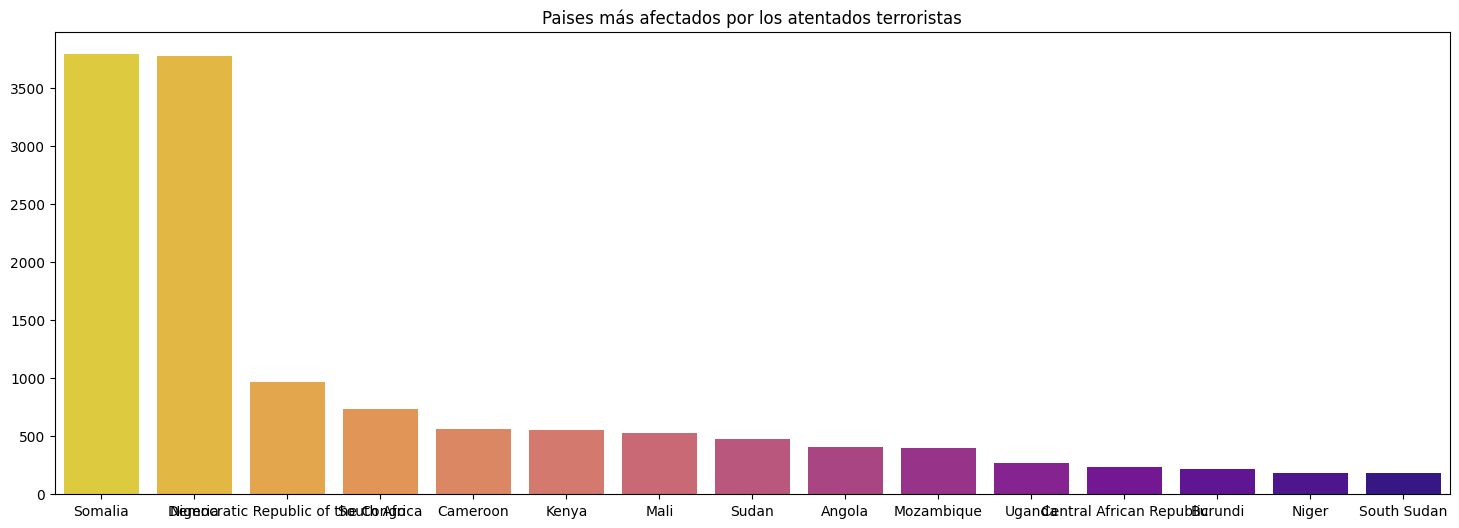

In [135]:
plt.subplots(figsize=(18,6))
sns.barplot(x=d['país_txt'].value_counts()[:15].index, y=d['país_txt'].value_counts()[:15].values,palette='plasma_r')
plt.title('Paises más afectados por los atentados terroristas')
plt.show()

Las ciudades que sufren mas atentados

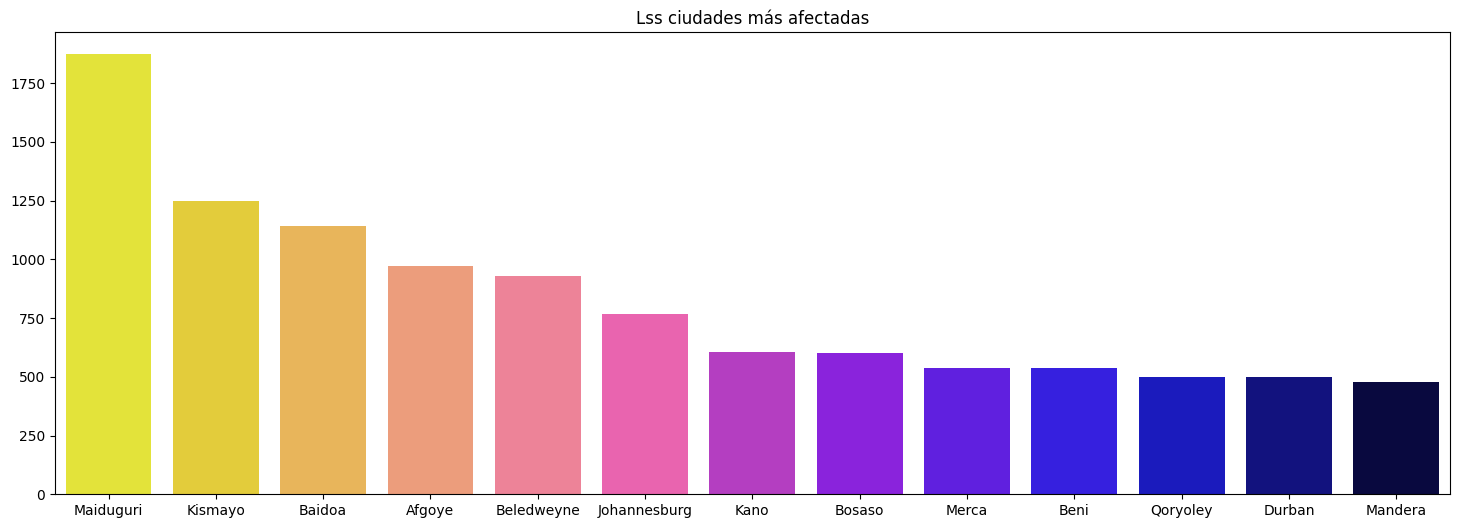

In [136]:
plt.subplots(figsize=(18,6))
sns.barplot(x=(d['ciudad'].value_counts()[2:15].index),y=(df['ciudad'].value_counts()[2:15].values),palette='gnuplot2_r')
x=x.tolist(),
y=y.tolist(),
marker_color=colors
plt.title('Lss ciudades más afectadas')
plt.show()

Cuales son los tipos de ataques utilizados

In [137]:
colors = ['lightslategray',] * 22
colors[0] = 'darkblue'
x=d['tipodeataque_txt'].value_counts().index
y=d['tipodeataque_txt'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Objetivos principales', xaxis_title="Objetivos",
    yaxis_title="Sumas de ocurrencias",)

Ataques vs Bajas

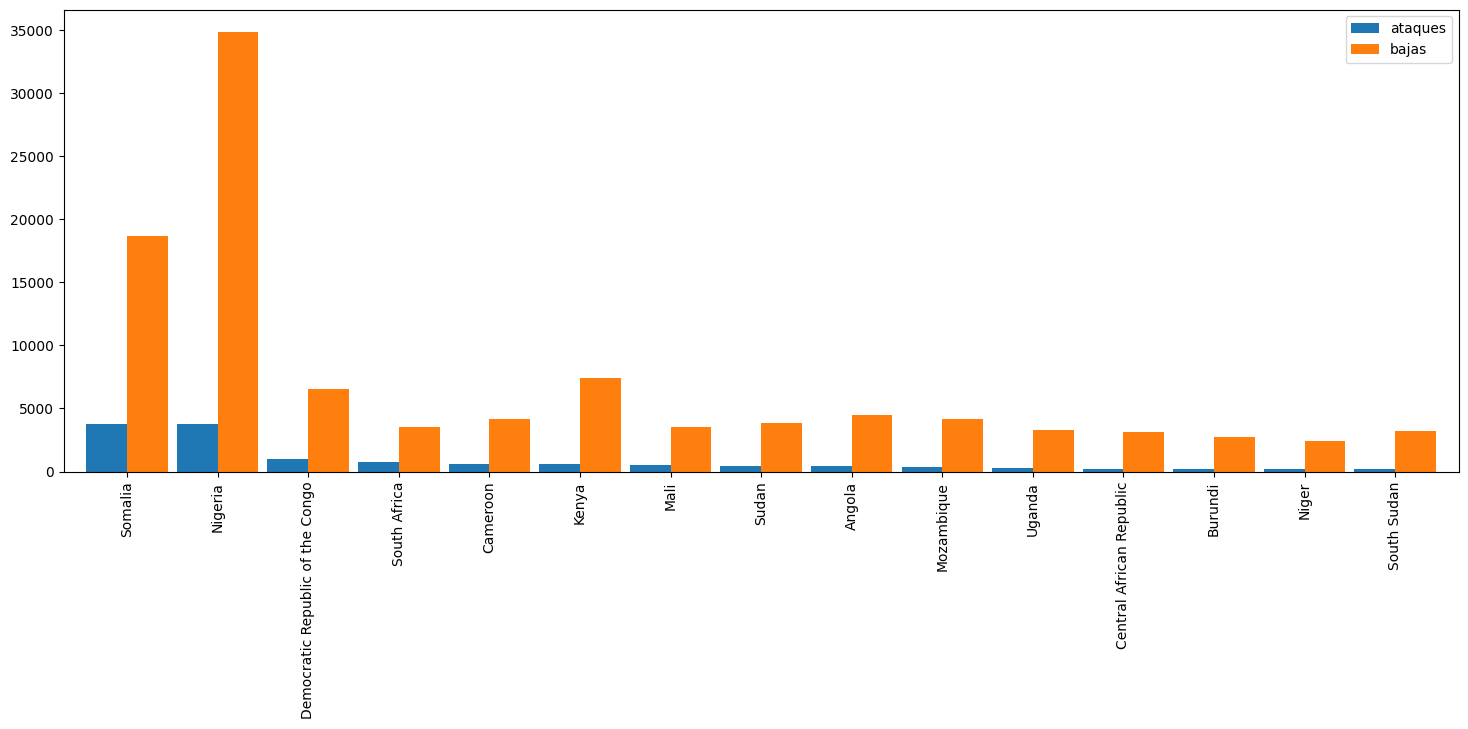

In [138]:
coun_terror=d['país_txt'].value_counts()[:15].to_frame()
coun_terror.columns=['ataques']
coun_kill=d.groupby('país_txt')['bajas'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Órganizaciones terroristas más activas

In [139]:
colors = ['lightslategray',] * 22
colors[13] = 'darkblue'
x=d['organizacion'].value_counts()[1:15].sort_values().values
y=d['organizacion'].value_counts()[1:15].sort_values().index
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors,orientation='h'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='organizaciones terroristas ordenadas por número ataques', xaxis_title="número de ataques",
    yaxis_title="principales organizaciones terroristas más activas",)

Actividad de los principales grupos terroristas

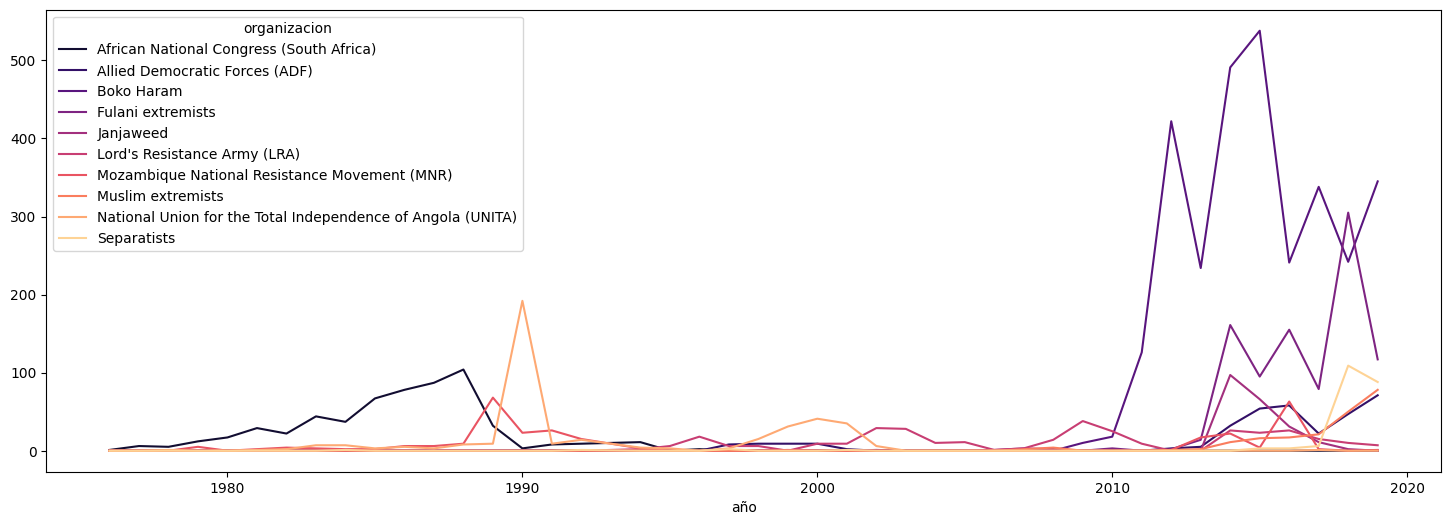

In [140]:
top_groups10=d[d['organizacion'].isin(d['organizacion'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.año,top_groups10.organizacion).plot(color=sns.color_palette('magma',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Motivación principal de los ataques

<ipython-input-142-b4e0c19de0bc>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



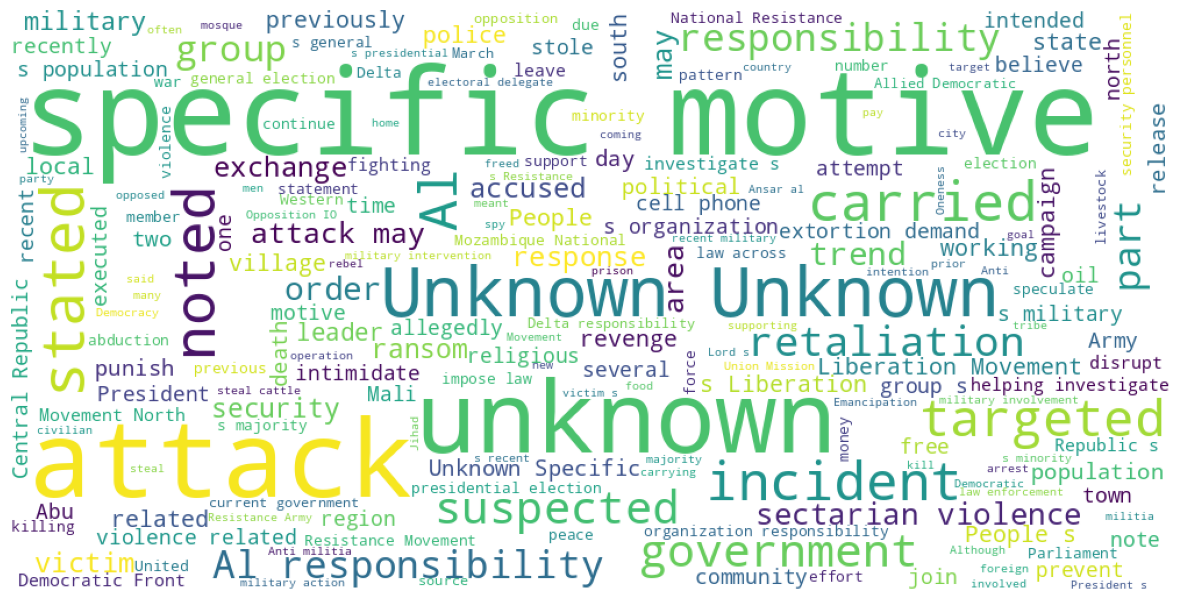

In [142]:
# Removing irrelevant words in clean_t column
import nltk
words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())

d['motivo'] = d['motivo'].apply(clean_sent)
south_df = df_new = d[d['motivo'].notnull()].reset_index()

ingredients = []
for i in range(0,len(south_df)):
    text = south_df['motivo'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
from wordcloud import WordCloud
from scipy import signal
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(text)
plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [143]:
df['país_txt'].value_counts().nlargest(500)[0:10]

Afghanistan       10719
India              8565
Iraq               7233
Colombia           6551
Philippines        5233
Peru               5210
United Kingdom     4355
Yemen              4078
El Salvador        3862
Somalia            3805
Name: país_txt, dtype: int64

In [144]:
options =['Somalia','Nigeria','Democratic Republic of the Congo','South Africa','Cameroon', 'Kenya','Mali','Sudan','Angola','Mozambique']
  # selecting rows based on condition
d_p = df.loc[df['país_txt'].isin(options)]
print('\nd_o :\n', d_p)


d_o :
                año  mes  día                          país_txt  \
eventid                                                          
197303000000  1973    3    1                             Sudan   
197502000000  1975    2    0                             Kenya   
197503000000  1975    3    1                             Kenya   
197503000000  1975    3   25                           Somalia   
197504000000  1975    4   11                             Kenya   
...            ...  ...  ...                               ...   
201912000000  2019   12   28  Democratic Republic of the Congo   
201912000000  2019   12   29                             Sudan   
201912000000  2019   12   29                           Nigeria   
201912000000  2019   12   29  Democratic Republic of the Congo   
201912000000  2019   12   31                          Cameroon   

                      región_txt        ciudad     latitud    longitud  crit  \
eventid                                              

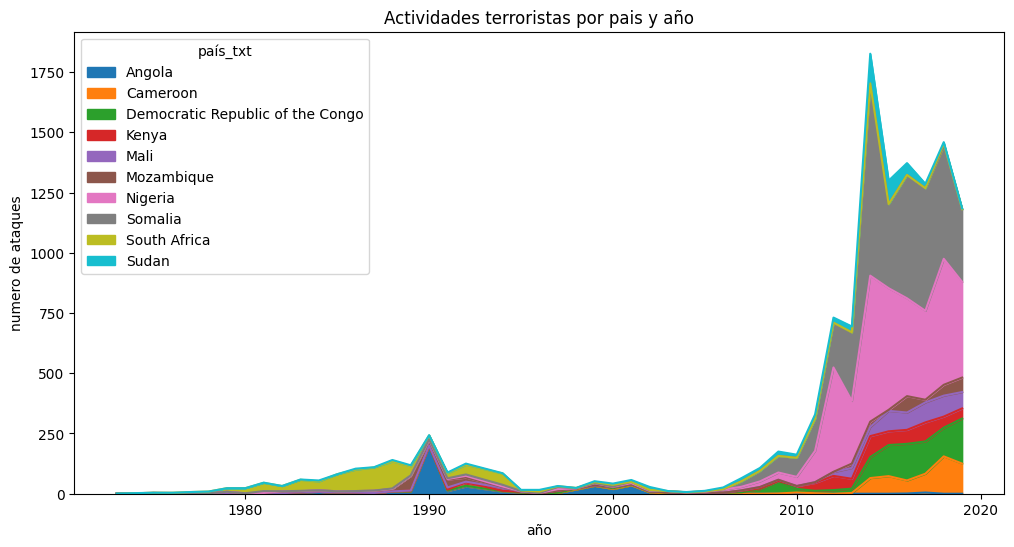

In [145]:
#using crosstab
#plotting a area graph
pd.crosstab(d_p.año, d_p.país_txt).plot(kind='area',figsize=(12,6))
plt.title('Actividades terroristas por pais y año')
plt.ylabel('numero de ataques')
plt.show()

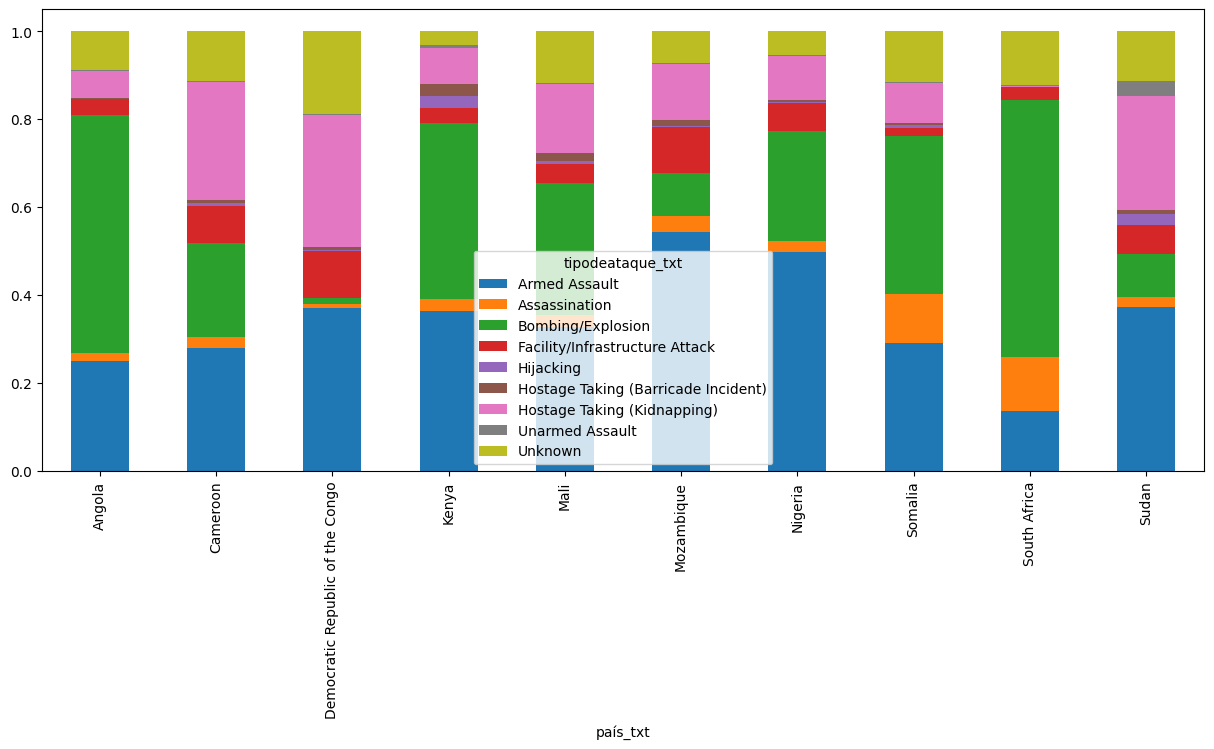

In [146]:
country_counts = d_p['país_txt'].value_counts()

# select countries with count more than 2000
selected_countries = country_counts[country_counts > 200].index

# filter the dataset to include only the selected countries
selected_data = df[df['país_txt'].isin(selected_countries)]

# create cross-tabulation of selected data
cross_tab = pd.crosstab(selected_data['país_txt'], selected_data['tipodeataque_txt'], normalize='index')

# plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True , figsize=(15,6))
#stacked=True tells the method to stack the bars on top of each other rather than placing them side by side.

plt.show()


In [149]:
import seaborn as sns

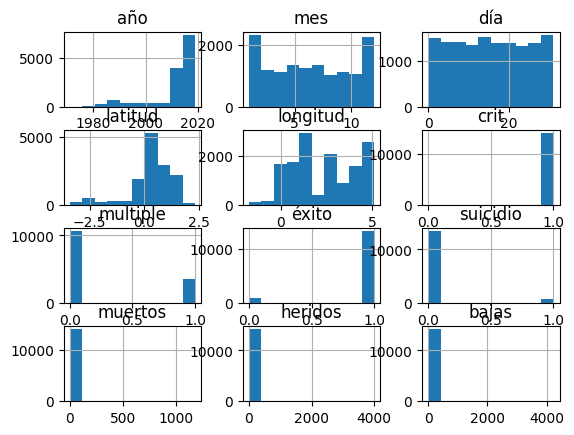

In [ ]:
#0.2.1 Univariate Histograms
#
d.hist()
plt.show()

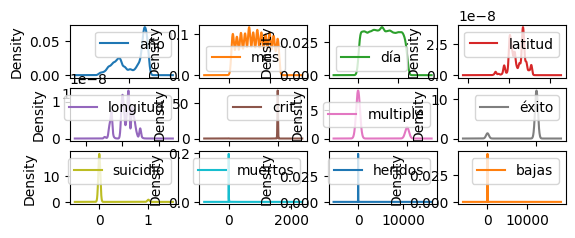

In [ ]:
#0.2.2 Density Plots
df_limpio.plot(kind='density', subplots=True, layout=(6,4), sharex=False)
plt.show()

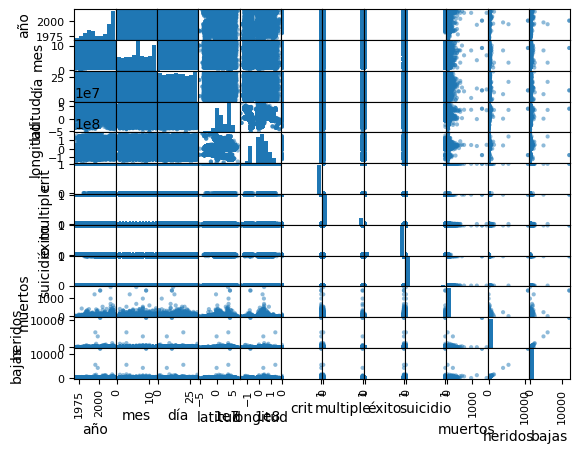

In [ ]:
#0.2.3 Scatterplot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df_limpio)
plt.show()

In [ ]:
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()

    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);

    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

In [ ]:
import scipy
import scipy.cluster.hierarchy as sch

def _clustering_pass(sub, is_corr):
    df = sub.copy()

    if is_corr:
        X = df.values
    else:
        X = df.corr().values
    d = sch.distance.pdist(X)
    L = sch.linkage(d, method='complete')
    ind = sch.fcluster(L, 0.5*d.max(), 'distance')

    columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
    df = df.reindex(columns, axis='columns')
    if is_corr: df = df.reindex(columns, axis='index')

    unique, counts = np.unique(ind, return_counts=True)
    counts = dict(zip(unique, counts))

    return (ind, counts, df)

def cluster_layer(sub, cluster_th, max_level, is_corr=False, level=1):
    '''Perform Hierarchical clustering on either raw data or a correlation matrix.

    Input:
        sub: pandas DataFrame of the data or correlation matrix of the data
        cluster_th: threshold of the size of the minimum cluster to sub cluster.
        max_level: maximum number of recursion allowed i.e. maximum of time we will sub cluster bigger clusters
        is_corr: if a correlation matrix is used as input, set to True
    Output:
        df: pandas DataFrame for which the columns (and rows if the input is a correlation matrix)
            have been ordered according to the hierarchical clustering'''
    df = sub.copy()
    ind, counts, df = _clustering_pass(df, is_corr)

    print('level: {} shape of the matrix clustered: {}'.format(level, df.shape))

    if level < max_level:
        i = 0
        j = 0
        columns = []
        for cluster_l1 in set(sorted(ind)):
            j += counts[cluster_l1]
            if is_corr:
                sub = df.iloc[i:j,i:j]
            else:
                sub = df[df.columns.values[i:j]]
            if counts[cluster_l1]>cluster_th:
                sub = cluster_layer(sub, cluster_th, max_level, is_corr, level+1)

            cols = sub.columns.tolist()
            columns.extend(cols)
            i = j
        df = df.reindex(columns, axis='columns')
        if is_corr: df = df.reindex(columns, axis='index')

    return df

In [ ]:
import pandas as pd
import numpy as np

# Generate 50 variables with 1000 samples
n_variables = 50
n_samples = 1000

# Those variables will be spread over 3 clusters of variable sizes
cluster_size = [5,22,28]
n_clusters = len(cluster_size)

# Assign each variable to a cluster
belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
for i in range(n_variables):
    variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])

df = pd.DataFrame(np.array(variables).transpose())

<ipython-input-107-44ed64c0ada4>:12: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



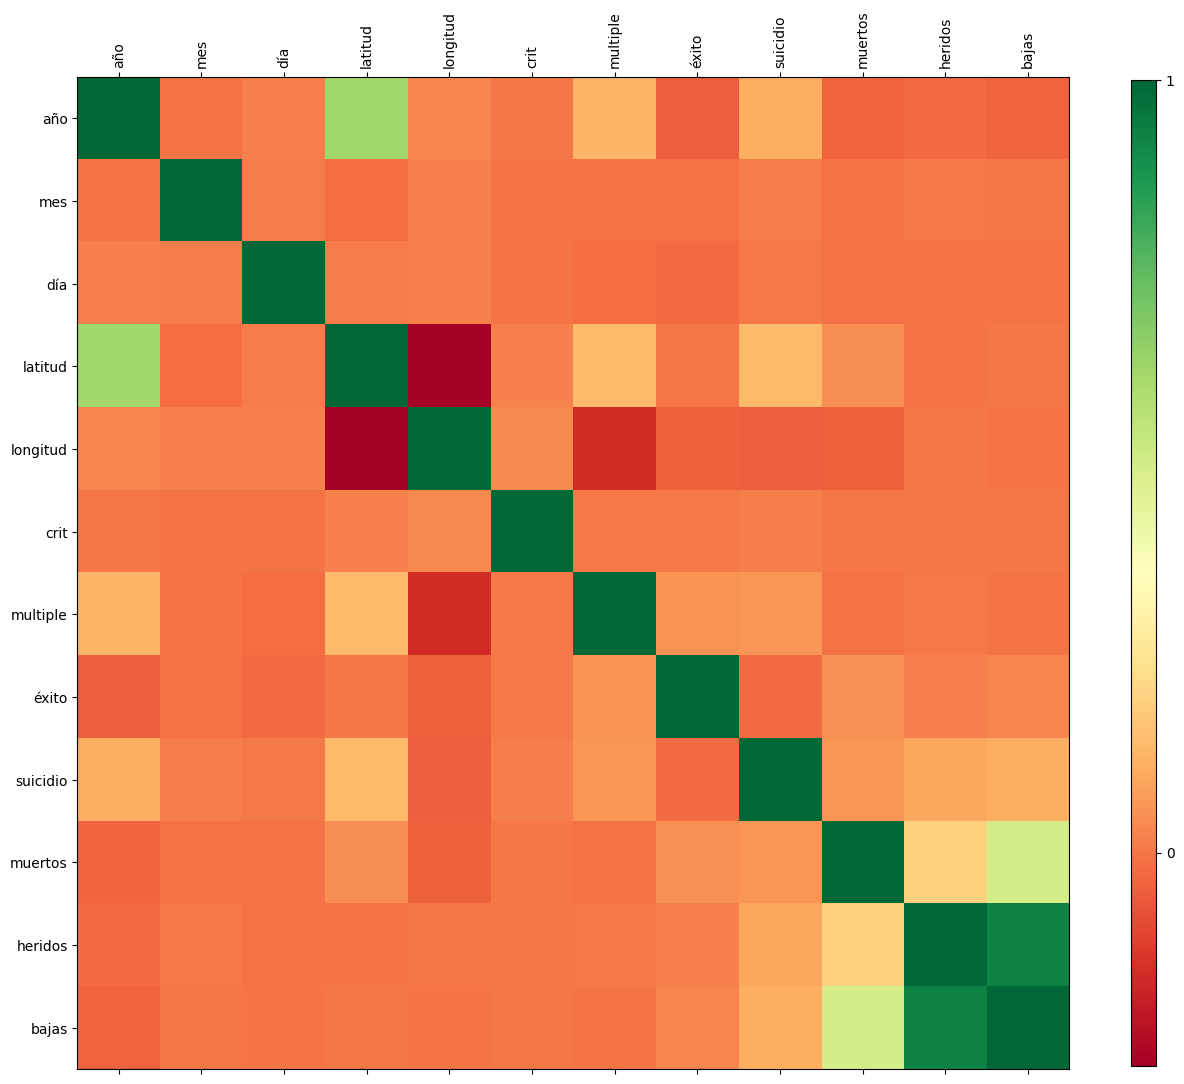

In [ ]:
plot_corr(d, size=16)